In [ ]:
import pandas as pd
import numpy as np
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())

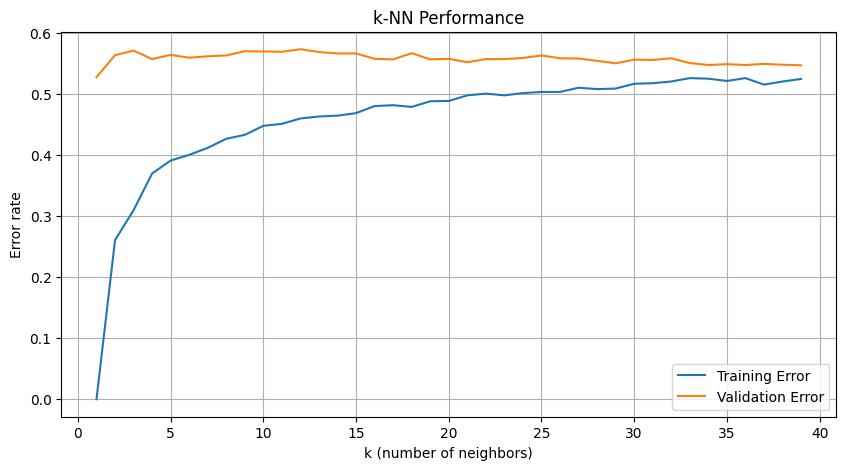

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Data (X, Y) is already loaded and preprocessed from previous cells.
# X = df.drop("quality", axis=1)
# Y = np.array([0 if q <= 5 else 1 for q in df["quality"]])

# Convert Y to a 1D numpy array to avoid DataConversionWarning
Y = Y.values.ravel()

# Split data using the already defined X and Y
Xa, Xt, Ya, Yt = train_test_split(X, Y, test_size=1/3, stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, test_size=0.5, stratify=Ya)

# K values
k_vector = np.arange(1, 40)
error_train = np.zeros(len(k_vector))
error_val = np.zeros(len(k_vector))

# Loop
for i, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    error_train[i] = 1 - accuracy_score(Ya, clf.predict(Xa))
    error_val[i] = 1 - accuracy_score(Yv, clf.predict(Xv))

# Plot
plt.figure(figsize=(10,5))
plt.plot(k_vector, error_train, label="Training Error")
plt.plot(k_vector, error_val, label="Validation Error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN Performance")
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

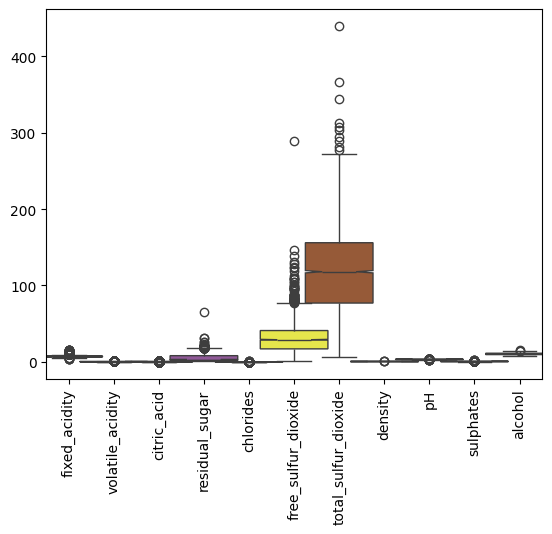

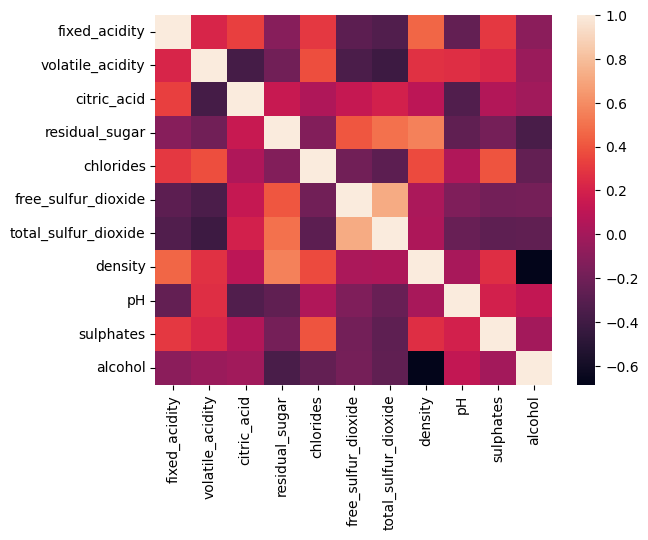

In [25]:
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
import numpy as np
import pandas as pd

# Ensure Y is in a proper format (e.g., pandas Series or DataFrame) before transformation
# From cell ci8F1j64ndqZ, Y is wine_quality.data.targets which is a DataFrame with 'quality' column.
if isinstance(Y, pd.DataFrame) and 'quality' in Y.columns:
    Y = np.array([0 if val <= 5 else 1 for val in Y['quality']])
elif isinstance(Y, (pd.Series, np.ndarray, list)):
    Y = np.array([0 if val <= 5 else 1 for val in Y])
else:
    print("Warning: Y is in an unexpected format. Attempting to proceed.")
    Y = np.array([0 if val <= 5 else 1 for val in Y])

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
# Fix UserWarning: set_ticklabels() should only be used with a fixed number of ticks
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)


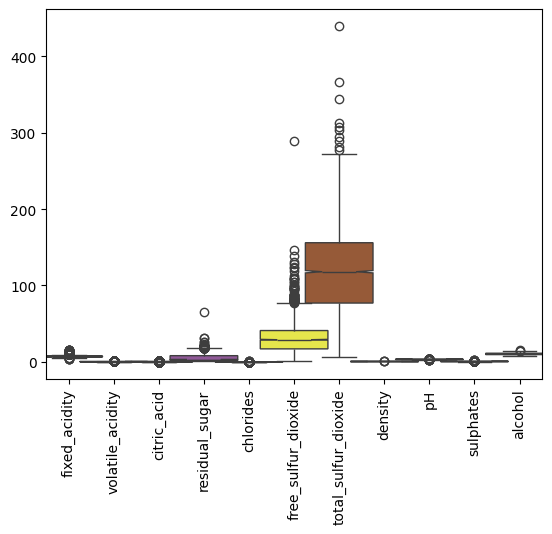

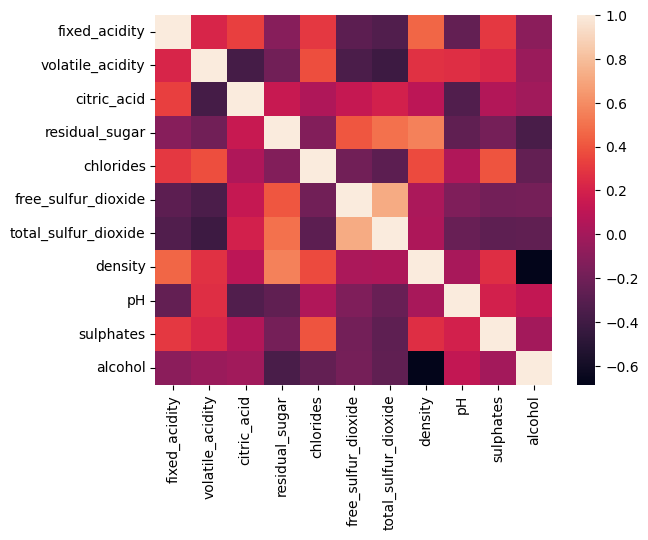

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
# Fix UserWarning: set_ticklabels() should only be used with a fixed number of ticks
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

# Ensure Y is a 1D numpy array for sklearn functions, as it might be a list or DataFrame
# This check is added for robustness, though Y should now be a np.array from cell 7LHOdiypqSOI
if isinstance(Y, list):
    Y = np.array(Y)
elif hasattr(Y, 'values'): # If it's a pandas Series/DataFrame
    Y = Y.values.ravel()

Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
error_v = 1-accuracy_score(Yv, Ypred_v)

# some hints
k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)
for ind, k in enumerate(k_vector):
    #fit with k
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xa, Ya)
    # predict and evaluate on training and validation sets
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

# some hints: get the min error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)


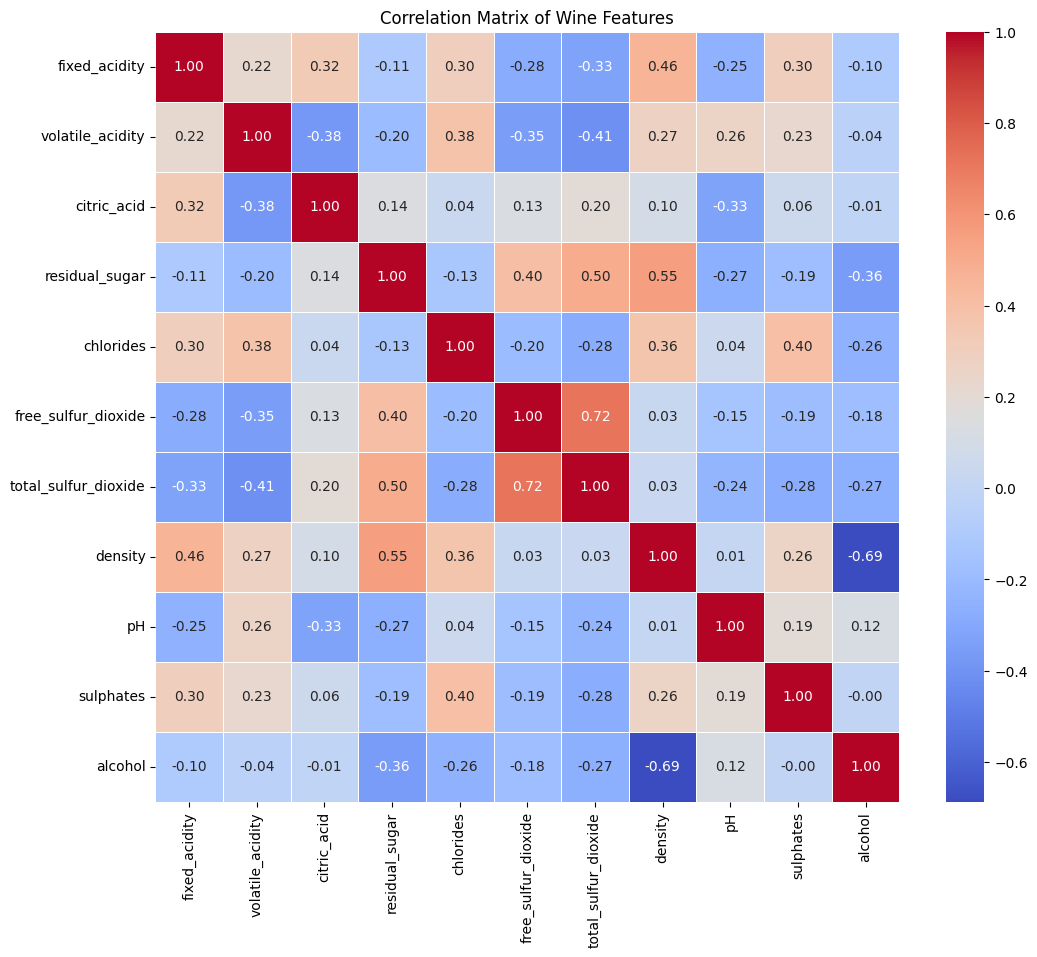

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X is defined (should be from previous steps)
if 'X' not in locals():
    print("X variable not found. Please ensure data is loaded and preprocessed.")
else:
    # Calculate the correlation matrix
    corr_matrix = X.corr()

    # Plotting the heatmap with annotations
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Wine Features')
    plt.show()